In [1]:
import pandas as pd
import pickle
import seaborn as sns
from sklearn.cluster import KMeans #聚类模块
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_pickle('./output/df_performance-win-0924.pkl.zstd', compression='zstd')

In [3]:
df.webgl_time.count()

6406

In [4]:
a = df[~df.webgl_time.isna()].index.unique().tolist()
pickle.dump(a, open('./output/valid_ids.pkl', 'wb'))

In [5]:
import json
b = json.load(open('../0422.json', 'r'))

In [8]:
c = []
for i in a:
    c.append(b[i])
json.dump(c, open('../0928.json', 'w'))

In [56]:
df_webgl = df[~df.webgl_time.isna()]
df_webgl

,status,js_real,js_full,render_real,render_full,gpu_real,gpu_full,webgl_time,dropped_frame_duration,frames_count,mem_mean_browser,mem_mean_gpu_process,mem_mean_renderer,mem_mean_other,mem_detail
2,Ok,0.293002,0.347686,0.596507,1.121088,0.477148,0.546192,0.397707,3.599856,549.0,19.011719,159.231250,280.062305,110.472656,"{'Browser_3_3865001': [15.80859375, 17.1367187..."
11,Ok,0.402790,0.430216,0.004060,0.010074,1.218612,1.329986,0.438235,0.066664,596.0,16.750977,78.301367,190.991992,131.164062,"{'Browser_3_3867508': [14.87109375, 16.1875, 1..."
15,Ok,0.464174,0.487668,0.003720,0.006401,1.546699,1.740462,0.816803,0.049998,598.0,16.395117,63.532422,67.478906,102.581836,"{'Browser_4_3867869': [14.03125, 15.140625, 16..."
17,Ok,2.138374,2.133151,0.004739,0.005578,3.032863,3.181700,1.477999,0.066664,596.0,269.283203,730.773828,871.354687,117.880859,"{'Browser_4_3869209': [266.890625, 268.4296875..."
20,Ok,0.521231,0.538770,0.000912,0.002055,3.009246,3.116726,0.281182,0.049998,597.0,16.233984,133.102734,107.554883,72.954492,"{'Browser_5_3868209': [14.0625, 15.5, 15.73046..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29217,Ok,0.733249,0.759828,0.016013,0.049365,0.866337,0.919735,0.199210,0.049998,597.0,18.123047,342.300977,572.262891,318.020117,"{'Browser_4_477166': [15.74609375, 17.42578125..."
29219,Ok,0.450169,0.499969,0.011870,0.014931,1.457003,1.540334,0.155616,0.066664,596.0,16.543945,243.499414,57.811133,69.150195,"{'Browser_3_528807': [14.1875, 15.765625, 16.1..."
29221,Ok,0.413355,0.437974,0.005166,0.007547,0.438509,0.483586,0.181646,0.199992,588.0,19.312500,95.976172,148.559766,95.992773,"{'Browser_3_543133': [17.44921875, 18.7109375,..."
29224,Ok,0.195364,0.269263,0.002610,0.004430,0.387614,0.446704,0.115004,0.066664,596.0,17.127930,92.265430,53.967383,82.219922,"{'Browser_4_678851': [14.8984375, 16.30078125,..."


In [57]:
tmp = df_webgl[df_webgl['frames_count'] > 700]
tmp

,status,js_real,js_full,render_real,render_full,gpu_real,gpu_full,webgl_time,dropped_frame_duration,frames_count,mem_mean_browser,mem_mean_gpu_process,mem_mean_renderer,mem_mean_other,mem_detail
2901,Ok,0.501433,0.499706,0.060673,0.056578,0.547700,0.682336,0.020457,0.433316,1176.0,18.280078,181.833594,172.226953,148.672461,"{'Browser_2_135474': [15.7890625, 17.46484375,..."
14388,Ok,0.707555,0.616731,0.004291,0.004596,0.910463,1.004712,0.294781,0.116662,1794.0,152.642773,379.235352,654.373047,80.736719,"{'Browser_3_2062092': [150.83984375, 152.16796..."
14391,Ok,0.769876,0.793917,0.007602,0.008204,0.620582,0.661551,0.146884,0.133328,1192.0,75.667187,233.392773,583.208008,89.678906,"{'Browser_4_2063405': [73.3671875, 74.640625, ..."


In [32]:
assert len(tmp) < 5

In [33]:
tmp = df_webgl[df_webgl['webgl_time'] > 10.5]
assert len(tmp) < 5
tmp

,status,js_real,js_full,render_real,render_full,gpu_real,gpu_full,webgl_time,dropped_frame_duration,frames_count,mem_mean_browser,mem_mean_gpu_process,mem_mean_renderer,mem_mean_other,mem_detail
24642,Ok,0.020989,0.023901,0.003033,0.003244,0.48522,14.350169,14.329494,0.08333,281.0,77.932528,1961.849787,1236.379688,160.613281,"{'GPU Process_4_3288': [315.8828125, 2439.0468..."


In [58]:
wrong_index = (df_webgl['frames_count'] > 700) | (df_webgl['webgl_time'] > 10.5)
assert(len(df_webgl[wrong_index]) < 5)
tmp = df_webgl[wrong_index]
df_webgl = df_webgl[~wrong_index]
tmp

,status,js_real,js_full,render_real,render_full,gpu_real,gpu_full,webgl_time,dropped_frame_duration,frames_count,mem_mean_browser,mem_mean_gpu_process,mem_mean_renderer,mem_mean_other,mem_detail
2901,Ok,0.501433,0.499706,0.060673,0.056578,0.547700,0.682336,0.020457,0.433316,1176.0,18.280078,181.833594,172.226953,148.672461,"{'Browser_2_135474': [15.7890625, 17.46484375,..."
14388,Ok,0.707555,0.616731,0.004291,0.004596,0.910463,1.004712,0.294781,0.116662,1794.0,152.642773,379.235352,654.373047,80.736719,"{'Browser_3_2062092': [150.83984375, 152.16796..."
14391,Ok,0.769876,0.793917,0.007602,0.008204,0.620582,0.661551,0.146884,0.133328,1192.0,75.667187,233.392773,583.208008,89.678906,"{'Browser_4_2063405': [73.3671875, 74.640625, ..."


<Axes: xlabel='gpu_full', ylabel='webgl_time'>

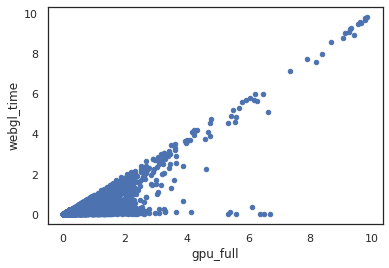

In [59]:
df_webgl[['gpu_full', 'webgl_time']].plot.scatter(x='gpu_full', y='webgl_time')

<Axes: ylabel='Frequency'>

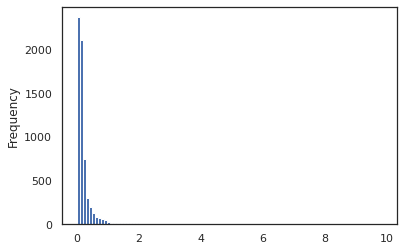

In [60]:
df_webgl.webgl_time.plot.hist(bins=100)

<Axes: ylabel='Frequency'>

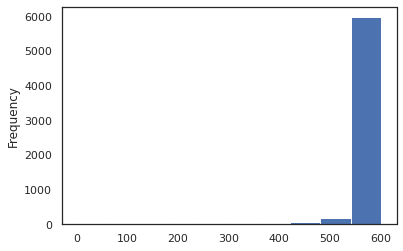

In [61]:
df_webgl.frames_count.plot.hist()

In [62]:
# df_webgl[(df_webgl.frames_count < 400) & (df_webgl.dropped_frame_duration < 2)]

In [63]:
df_webgl_array = df_webgl.iloc[:, 1:-1]

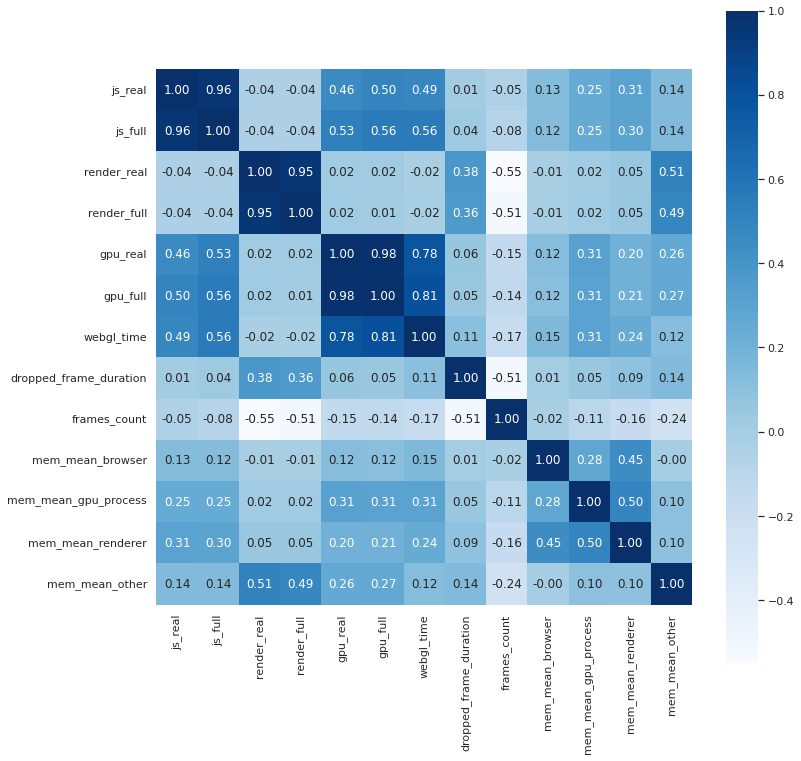

In [64]:
plt.figure(figsize=(12,12))
sns.set_theme(style="white")
corr = df_webgl_array.corr(method='pearson')
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.2f', square=True)

# Clustering

In [65]:
df_webgl_array = df_webgl_array[['frames_count', 'js_real', 'render_real', 'gpu_real', 'webgl_time', 'mem_mean_gpu_process', 'mem_mean_renderer']]

In [66]:
std = df_webgl_array.std(axis=0)
mean = df_webgl_array.mean(axis=0)
df_scaled = (df_webgl_array - mean) / std
df_scaled.fillna(0, inplace=True)

In [67]:
SSE = []
SCORE = []
RANGE = range(3, 12)
for clusters in RANGE:
    km = KMeans(n_clusters=clusters, n_init='auto', random_state=42, max_iter=1000).fit(df_scaled)
    SSE.append(km.inertia_)
    score = silhouette_score(df_scaled, km.labels_, random_state=42)
    SCORE.append(score)
SSE = np.array(SSE)
SCORE = np.array(SCORE)

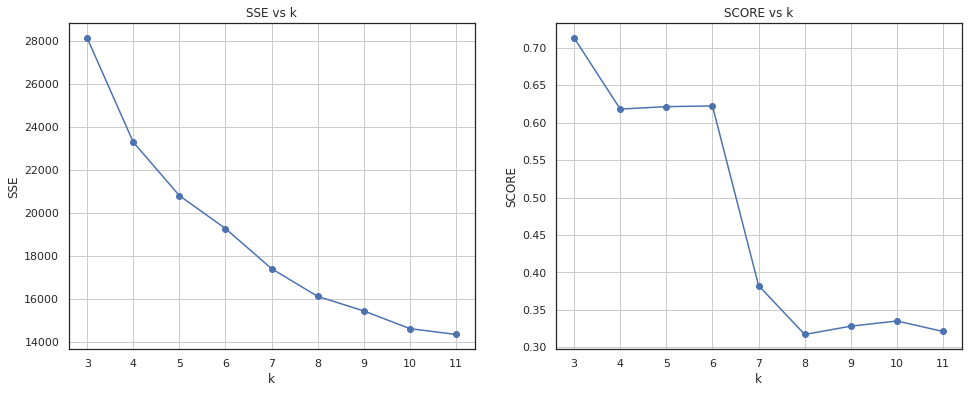

In [68]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(RANGE, SSE, 'o-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.xticks(np.arange(min(RANGE), max(RANGE)+1, 1.0))
plt.grid(True)
plt.title('SSE vs k')
plt.subplot(1, 2, 2)
plt.plot(RANGE, SCORE, 'o-')
plt.xlabel('k')
plt.ylabel('SCORE')
plt.xticks(np.arange(min(RANGE), max(RANGE)+1, 1.0))
plt.grid(True)
plt.title('SCORE vs k')
plt.savefig('./output/figures/SSE_and_silhouette.png', bbox_inches='tight', dpi=300)

In [69]:
N = 6
km = KMeans(n_clusters=N, n_init='auto', random_state=42, max_iter=1000).fit(df_scaled)
center = km.cluster_centers_
center_min = center.min(axis=0)
center_max = center.max(axis=0)
center_01 = (center - center_min) / (center_max - center_min)
real_center = (center * std.values) + mean.values
center_01[:, 0] = real_center[:, 0] / 600
# real_center_0_1 = (center - center.min(axis=0)) / (center.max(axis=0) - center.min(axis=0)) 
labels = km.labels_
num = pd.Series(labels).value_counts().sort_index().astype(str)
r = pd.concat([num, pd.DataFrame(real_center)], axis=1)
r.columns = ['num'] + list(df_webgl_array.columns)
r

,num,frames_count,js_real,render_real,gpu_real,webgl_time,mem_mean_gpu_process,mem_mean_renderer
0,5601,586.800393,0.332505,0.091322,0.531931,0.163142,120.331392,103.915128
1,31,382.225806,3.435657,0.081574,7.327858,7.220574,484.443159,330.310573
2,67,191.373134,0.633670,1.121593,0.572191,0.069427,198.416215,200.130458
3,321,575.018692,0.988856,0.122953,0.818249,0.478790,432.836656,482.607035
4,306,584.437908,2.915274,0.111136,1.706609,1.278242,193.428681,198.830367
5,62,242.661290,0.095882,7.084126,0.505325,0.157963,145.870600,180.179232


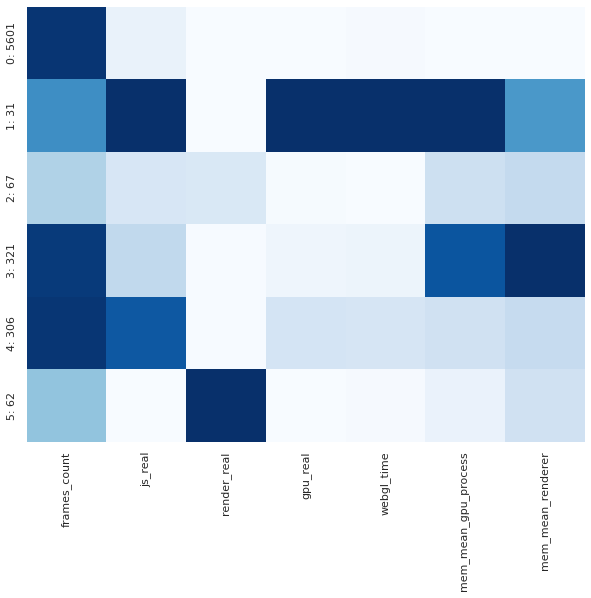

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(center_01, vmin=0, vmax=1, square=False, annot=False, cbar=False, fmt='.2f', cmap='Blues', yticklabels=['{}: {}'.format(x,y) for x, y in zip(num.index, num.values)], xticklabels=df_webgl_array.columns) # type: ignore
plt.savefig('./output/figures/heatmap-complexity.pdf', bbox_inches='tight')
plt.savefig('./output/figures/heatmap-complexity.png', bbox_inches='tight', dpi=300)

bugs:
- 18896 https://www.alan-consortium.jp/  水波纹
- 27616 https://www.thesheldon.org/  
- 20307 5FPS?


In [51]:
df_scaled[labels==3].sample(10) * std.values + mean.values

,frames_count,js_real,render_real,gpu_real,webgl_time,mem_mean_gpu_process,mem_mean_renderer
12539,53.0,0.043108,0.007519,0.016275,0.005060,503.265625,293.855469
19612,417.0,0.012936,10.900266,0.680549,0.070503,392.428454,177.796875
2770,600.0,0.455281,3.268173,0.810641,0.160707,685.302148,242.101758
7099,415.0,0.001575,8.846696,0.326357,0.300874,536.313477,191.918945
14423,11.0,0.005478,0.006148,0.010206,0.000841,279.106771,400.044271
15787,241.0,2.534443,3.934039,0.827816,0.737161,968.652344,286.451451
27616,365.0,0.009170,5.966769,0.132804,0.062724,734.019531,145.129883
16526,494.0,0.001966,8.985191,0.248412,0.098482,495.565430,133.638477
16530,509.0,0.771295,2.969914,0.867241,0.924126,624.679688,286.291211
15894,450.0,0.021747,7.074006,0.375672,0.091935,1215.016357,143.833740


In [23]:
df_scaled[labels==2].sample(10) * std.values + mean.values

,frames_count,js_real,render_real,gpu_real,webgl_time,mem_mean_gpu_process,mem_mean_renderer
1221,560.0,2.405549,0.004052,1.053449,1.030550,1565.784375,783.245508
6781,576.0,2.234411,0.041823,1.890181,1.876757,559.997266,301.175586
15622,550.0,3.803871,2.400010,0.416826,0.867296,507.708789,225.903125
9481,584.0,0.091485,0.003066,0.024381,0.008686,1654.641211,824.082422
28075,552.0,2.007885,0.059528,1.266496,1.230446,1044.203125,416.627930
15812,572.0,4.605253,0.003634,4.159845,4.217077,842.145898,240.832617
16732,600.0,1.282093,0.074344,2.417921,2.268618,387.579102,127.808008
4472,310.0,0.611918,0.042257,1.076018,4.796441,2997.589518,591.025716
12296,577.0,0.158531,0.017356,0.012014,0.001091,320.831055,925.534375
29012,597.0,1.876079,0.002059,2.229560,2.264892,425.379297,389.295703


In [24]:
df_scaled.loc[2936] * std.values + mean.values

frames_count            253.000000
js_real                   9.122356
render_real               0.001146
gpu_real                  2.195341
webgl_time                2.104758
mem_mean_gpu_process    251.711914
mem_mean_renderer       134.008008
Name: 2936, dtype: float64

In [25]:
df_label = df_scaled * std.values + mean.values
df_label['label'] = labels
df_label

,frames_count,js_real,render_real,gpu_real,webgl_time,mem_mean_gpu_process,mem_mean_renderer,label
2,580.0,0.298668,0.036227,0.463825,0.538061,870.302734,347.040820,0
11,596.0,0.320799,0.005974,0.695051,0.501488,424.297461,271.012305,0
15,597.0,0.408880,0.008894,1.170316,1.173689,490.459570,135.200781,0
17,595.0,2.004322,0.003805,2.512404,2.554558,1172.514648,1039.843164,2
20,599.0,0.509029,0.002604,0.486789,0.379705,554.161328,178.023633,0
...,...,...,...,...,...,...,...,...
29217,594.0,0.935317,0.085225,0.437793,0.400385,912.806836,634.661133,2
29219,597.0,0.461793,0.014106,0.478780,0.217637,516.396680,140.059570,0
29221,587.0,0.379386,0.007903,0.187927,0.161195,468.408594,220.606641,0
29224,594.0,0.289671,0.004740,0.162175,0.128084,409.140430,117.831250,0


In [26]:
df_label.loc[2936]

frames_count            253.000000
js_real                   9.122356
render_real               0.001146
gpu_real                  2.195341
webgl_time                2.104758
mem_mean_gpu_process    251.711914
mem_mean_renderer       134.008008
label                     2.000000
Name: 2936, dtype: float64